# Application de l'ACP sur le jeu de donneés de thegoodscents

Empty DataFrame
Columns: [abricot, absinthe, acajou, acétique, acétone, acrylate, agneau, agrume, ail, airelle, alcool, aldéhyde, algue, alliacé, amande, amande amère, amande torréfiée, ambre gris, ambrette, ananas, aneth, angélique, animal, anis, anisé, artichaut, ase fétide, asperge, aubépine, babeurre, bacon, baie, balsamique, banane, banane verte, barbe à papa, basilic, benjoin, bergamote, beurre, beurre de cacahuète, beurre rance, bière, bœuf cuit, bois, bois brûlé, bois d'agar, boisé, bonbon, boronia, bouillon, bouillon de légumes, bouillon de viande, bourgeon de cassis, brandy, brûlé, buchu, cacahuète, cacao, café, calamus, camomille, camphre, canneberge, cannelle, caoutchouc, câpres, capucine, carambole, caramel, caramel au beurre, carbonisé, cardamome, carotte, carvi, carvone, cassis, castoréum, cèdre, céréale, cerfeuil, cerise, chamallow, champignon, châtaigne, chêne, chèvre, chèvrefeuille, chicorée, chimique, chips, chocolat, chocolat noir, chou, chou-fleur, choucroute, chry

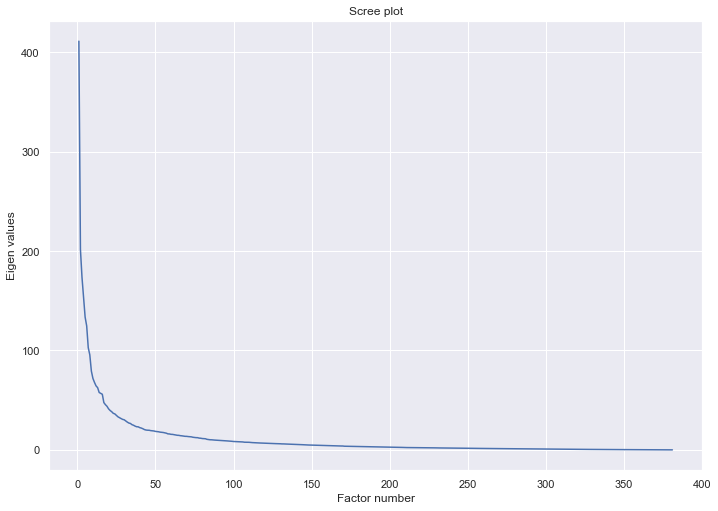

[[0.         1.0086358  1.01488242 ... 1.0156516  1.01701601 1.01300993]
 [1.0086358  0.         0.9497181  ... 0.95750027 0.96264431 1.0011715 ]
 [1.01488242 0.9497181  0.         ... 0.9030466  0.913987   0.99939528]
 ...
 [1.0156516  0.95750027 0.9030466  ... 0.         0.9276595  1.00156099]
 [1.01701601 0.96264431 0.913987   ... 0.9276595  0.         0.97136824]
 [1.01300993 1.0011715  0.99939528 ... 1.00156099 0.97136824 0.        ]]
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.000s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.182240
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 61.6550484, gradient norm = 0.4033135 (50 iterations in 0.056s)
[t-SNE] Iteration 100: error = 60.9825287, gradient norm = 0.4785289 (50 iterations in 0.056s)
[t-SNE] Iteration 150: error = 62.6733437, gradient norm = 0.6982413 (50 iteration

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

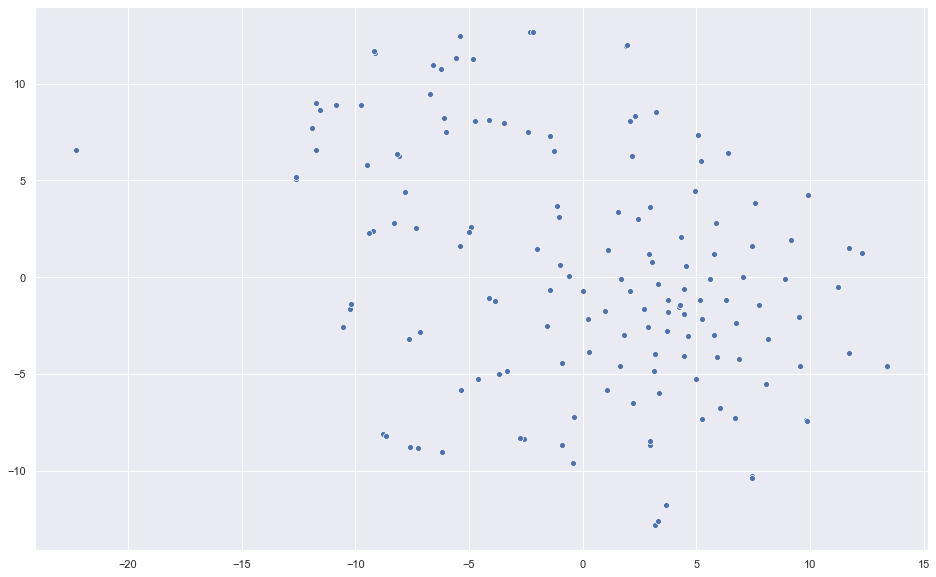

In [14]:
from sklearn.metrics.pairwise import cosine_distances
import pandas
from sklearn.manifold import TSNE
import seaborn as sns
X = pandas.read_csv("datagoodscents.csv",header=0,index_col=0)

print(X[:0])
index = 0
for col in X.columns: 
    headerText[index] = col
    index+=1;
print(headerText)
#dimension
print(X.shape) # (4573, 381)
X = X.T
print(X.shape)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]

import sklearn

#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)
#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 381

#variance expliquée
print("variance expliquer en fonction de l'axe")
#print(acp.explained_variance_)

#valeur corrigée de la variance expliquée
eigval = (p-1)/p*acp.explained_variance_
print("Eig val = ")
#print(eigval)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)

embed_mat = coord[:150]
embed_mat_cosine = cosine_distances(embed_mat)
print(embed_mat_cosine)

tsne = TSNE(n_components=2,metric='precomputed',verbose=2,n_iter=2000,perplexity=20,early_exaggeration = 12,learning_rate=10)
X_embedded = tsne.fit_transform(embed_mat_cosine)


df_subset = {} 
df_subset['tsne-2d-one'] = X_embedded[:,0]
df_subset['tsne-2d-two'] = X_embedded[:,1]
plt.figure(figsize=(16,10))
p1 = sns.scatterplot(X_embedded[:,0], X_embedded[:,1], legend='full', palette=palette)
for line in range(0,embed_mat_cosine.shape[0]):
     p1.text(df_subset['tsne-2d-one'][line]+0.01, df_subset['tsne-2d-two'][line], 
     headerText[line], horizontalalignment='left', 
     size='small', color='black', weight='semibold')

#cumul de variance expliquée
plt.plot(numpy.arange(1,n+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(100,100))
axes.set_xlim(-50,50) #même limites en abscisse
axes.set_ylim(-50,50) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-50,50],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-50,50],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


# Application de l'ACP sur le jeu de données d'Oniris

(54, 70)
70
                  1   2   3   4   5   6   7   8   9   10 ...  61  62  63  64  \
à noyaux           0   0   0   0   0   0   0   1   0   1 ...   0   0   0   0   
agrumes            0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
alcool             0   1   4   0   0   0   0  14   0   0 ...   0   0   0   0   
aldehyde           0   0   1   0   0   0   1   1   0   0 ...   0   0   0   1   
amande amère       0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
amylique           0   0   1   0   1   0   2   1   5  42 ...   0   0   0   0   
animal             0   4   0   0   2   0   3   0   0   0 ...   0   0   0   1   
anise              0   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
autre              0   0   1   0   0   0   0   1   0   0 ...   0   0   0   0   
beurre             0   1   0   0   0   0   0   0   0   1 ...   0   0   0   0   
boise              0   0   0   0   0   1   1   0   0   1 ...   1   0   0   0   
caramel            0   0   0

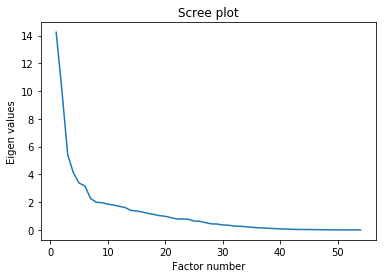

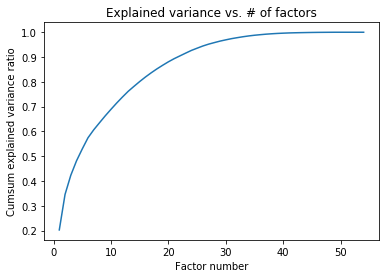

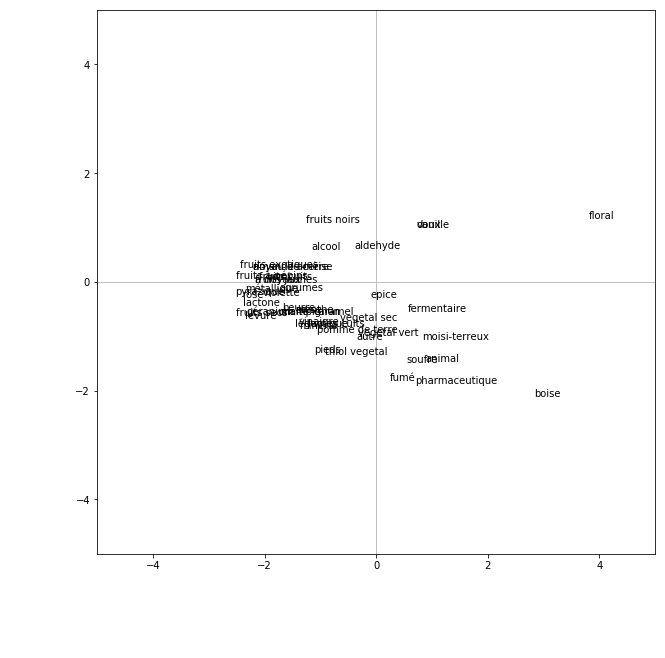

In [0]:
import pandas

X = pandas.read_csv("dataOniris.csv",header=0,index_col=0)
X = X.T
#dimension
print(X.shape) # (70, 54)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
print(p)

print(X)

import sklearn

#classe pour standardisation
from sklearn.preprocessing import StandardScaler
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
Z = sc.fit_transform(X)
print(Z)

#classe pour l'ACP
from sklearn.decomposition import PCA
#instanciation
acp = PCA(svd_solver='full')

#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 70

#variance expliquée
print("variance expliquer en fonction de l'axe")
print(acp.explained_variance_)

#valeur corrigée de la variance expliquée
eigval = (p-1)/p*acp.explained_variance_
print("Eig val = ")
print(eigval.shape)

#proportion de variance expliquée
print(acp.explained_variance_ratio_)
import matplotlib.pyplot as plt
import numpy
plt.plot(numpy.arange(1,n+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


#cumul de variance expliquée
plt.plot(numpy.arange(1,n+1),numpy.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-5,5) #même limites en abscisse
axes.set_ylim(-5,5) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()
